**Variable Glossary**
df - basic dataset
df_cleaned - dataset without unnecessary columns
X - dataframe that doesn't contain our dependent variable (income)
X2, X_proper, X3 - dataframe of X that only conatins age and education num
accuracy - measured accuracy of our logistic regression model
y - dataframe only containing our dependent variable (income)
There are more variables but these are the important ones

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [5]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [6]:
df_cleaned = df.dropna(subset='workclass', axis=0)
df_cleaned.info()
#Removed workclass column because its irrelevant to research question

<class 'pandas.core.frame.DataFrame'>
Index: 47879 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47879 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          47879 non-null  int64 
 3   education       47879 non-null  object
 4   education-num   47879 non-null  int64 
 5   marital-status  47879 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    47879 non-null  object
 8   race            47879 non-null  object
 9   sex             47879 non-null  object
 10  capital-gain    47879 non-null  int64 
 11  capital-loss    47879 non-null  int64 
 12  hours-per-week  47879 non-null  int64 
 13  native-country  47624 non-null  object
 14  income          47879 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [7]:
df_cleaned = df_cleaned.dropna(subset = 'occupation', axis=0)
df_cleaned.info()
#Occupation data is irrelevant to the Research question and contains large amounts of null values

<class 'pandas.core.frame.DataFrame'>
Index: 47876 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47876 non-null  int64 
 1   workclass       47876 non-null  object
 2   fnlwgt          47876 non-null  int64 
 3   education       47876 non-null  object
 4   education-num   47876 non-null  int64 
 5   marital-status  47876 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    47876 non-null  object
 8   race            47876 non-null  object
 9   sex             47876 non-null  object
 10  capital-gain    47876 non-null  int64 
 11  capital-loss    47876 non-null  int64 
 12  hours-per-week  47876 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47876 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [8]:
df_cleaned = df_cleaned.dropna(subset = 'native-country', axis=0)
df_cleaned.info()
#Removing native-country coumn from data due to being irrelevant to research and large amount of null values

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [9]:
for col in df:
    print(df[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
[ 77516  83311 215646 ... 173449  89686 350977]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
['Not-in-family' 'Hu

In [10]:
# Assuming your DataFrame is named df and the column with extra periods is 'column_name'

# Display the unique values to understand the pattern of extra periods
print(df_cleaned['income'].unique())

# Remove the extra periods from the column
df_cleaned['income'] = df_cleaned['income'].str.replace('.', '')

# Verify the unique values after removing the extra periods
print(df_cleaned['income'].unique())


['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [11]:
df_cleaned.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


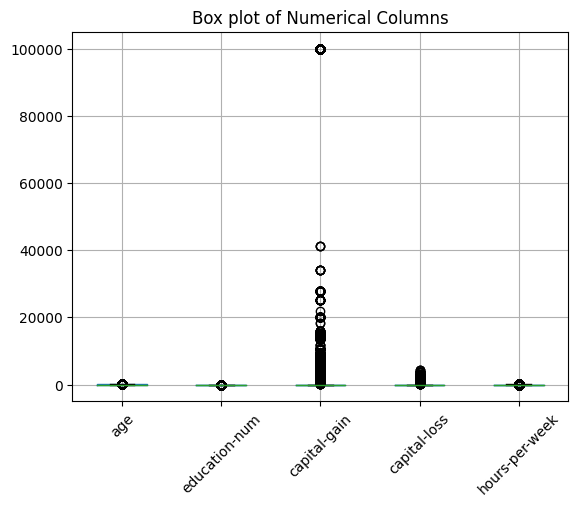

In [12]:
df.boxplot(column=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])
plt.title('Box plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()
#Creates a box plot to measure outliers in each numerical column. 
#The boxplot is in millions so it is difficult to see the values for columns other than fnlwgt(final-weight) 

/tmp/ipykernel_79/3527777858.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])
/tmp/ipykernel_79/3527777858.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x/10**6)) for x in ax2.get_yticks()])


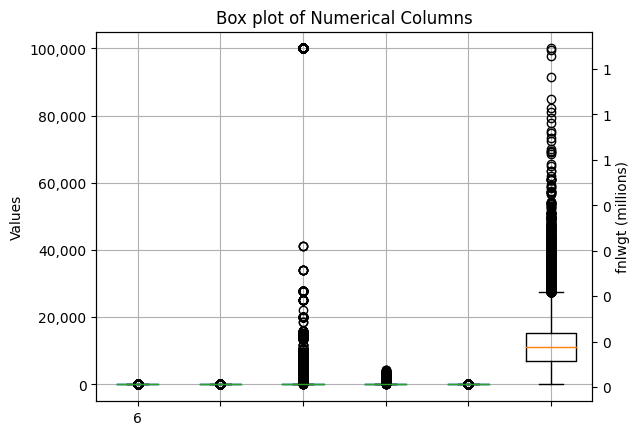

In [13]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
ax = df.boxplot(column=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

# Set the y-axis labels to display values in millions
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])

# Create a secondary y-axis for the fnlwgt column
ax2 = ax.twinx()
ax2.boxplot(df['fnlwgt'], positions=[6], widths=0.6)

# Set the y-axis labels for the secondary y-axis to display values in tens
ax2.set_yticklabels(['{:,}'.format(int(x/10**6)) for x in ax2.get_yticks()])

# Set labels and title
ax.set_ylabel('Values')
ax2.set_ylabel('fnlwgt (millions)')
plt.title('Box plot of Numerical Columns')

plt.xticks(rotation=45)
plt.show()


In [14]:
z_scores = (df_cleaned['fnlwgt'] - df_cleaned['fnlwgt'].mean()) / df_cleaned['fnlwgt'].std()
outliers = df_cleaned[abs(z_scores < 3)]
z_scores_age = (outliers['age'] - outliers['age'].mean()) / outliers['age'].std()
outliers = outliers[abs(z_scores_age < 3)]
outliers.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
print(outliers.nunique())
#Removing outliers for age and final weight

age                  63
workclass             9
fnlwgt            27398
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
hours-per-week       96
native-country       42
income                2
dtype: int64


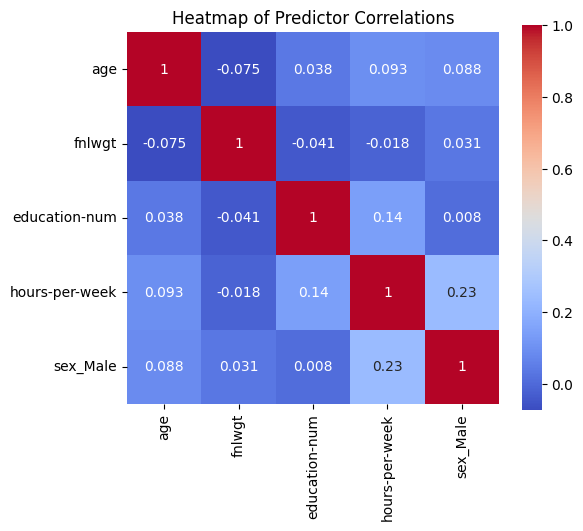

In [15]:
X = outliers.drop('native-country', axis=1)
X = X.drop('marital-status', axis=1)
X = X.drop('occupation', axis=1)
X = X.drop('education', axis=1)
X = X.drop('workclass', axis=1)
X = X.drop('relationship', axis=1)
X = X.drop('race', axis=1)
X = X.drop('income', axis=1)
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X.head(3)
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


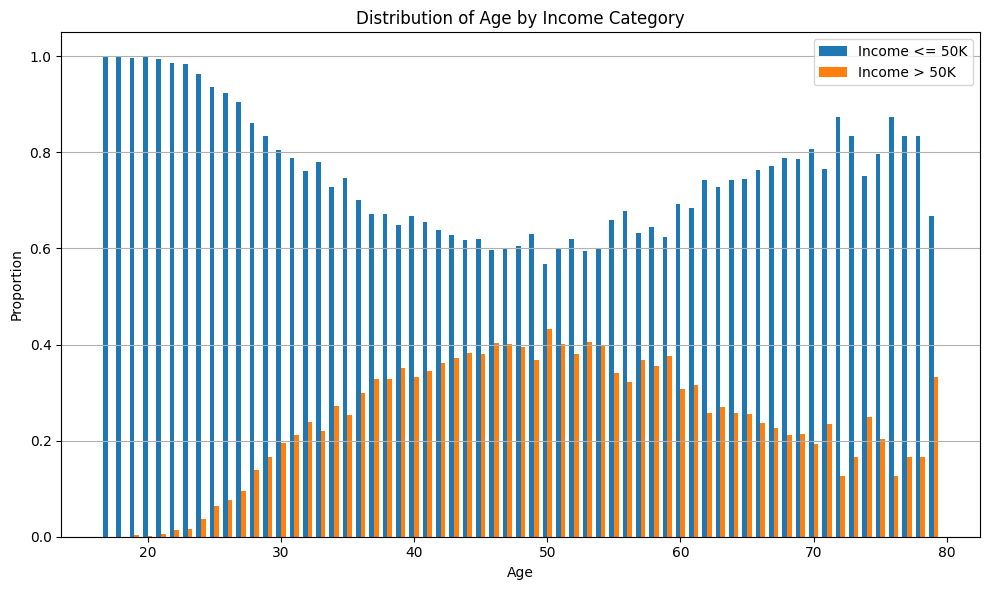

In [17]:
# Filtering the data for income categories '<=50K' and '>50K'
filtered_outliers = outliers[outliers['income'].isin(['<=50K', '>50K'])]

# Grouping and counting age and income
income_counts = filtered_outliers.groupby(['age', 'income']).size().unstack(fill_value=0)

# Calculate proportions
income_proportions = income_counts.div(income_counts.sum(axis=1), axis=0)

# Filtering income proportions
age = income_proportions.index.to_numpy()
income_less_than_50k = income_proportions['<=50K'].to_numpy()
income_greater_than_50k = income_proportions['>50K'].to_numpy()

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Adjust bar width for better separation

# Create bars for each income category
plt.bar(age - bar_width/2, income_less_than_50k, bar_width, label='Income <= 50K')
plt.bar(age + bar_width/2, income_greater_than_50k, bar_width, label='Income > 50K')

# Customize the plot for readability and display
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Distribution of Age by Income Category')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.legend()
plt.tight_layout()
plt.show()


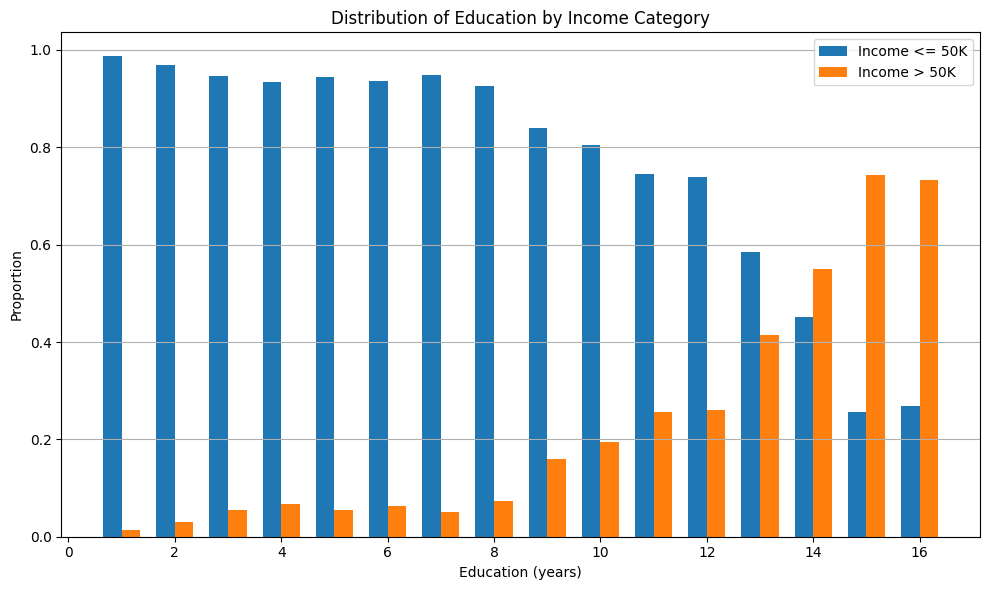

In [18]:
# Filtering data for income categories '<=50K' and '>50K'
filtered_outliers = outliers[outliers['income'].isin(['<=50K', '>50K'])]

# Group by age and income then count the values
income_counts = filtered_outliers.groupby(['education-num', 'income']).size().unstack(fill_value=0)

# Calculate proportions
income_proportions = income_counts.div(income_counts.sum(axis=1), axis=0)

# Filtering income proprtions
age = income_proportions.index.to_numpy()
income_less_than_50k = income_proportions['<=50K'].to_numpy()
income_greater_than_50k = income_proportions['>50K'].to_numpy()

# Create bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Adjust bar width for better separation

# Create bars
plt.bar(age - bar_width/2, income_less_than_50k, bar_width, label='Income <= 50K')
plt.bar(age + bar_width/2, income_greater_than_50k, bar_width, label='Income > 50K')

# Plot labels and title
plt.xlabel('Education (years)')
plt.ylabel('Proportion')
plt.title('Distribution of Education by Income Category')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.legend()
plt.tight_layout()
plt.show()


# Creating a Linear Regression Model

In [19]:
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True).astype(float)
y = df_cleaned['income_>50K']
X = df_cleaned.drop('income_>50K', axis=1)
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48836    0.0
48837    0.0
48839    0.0
48840    0.0
48841    1.0
Name: income_>50K, Length: 47621, dtype: float64

In [20]:
# constructing a linear-regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# now going to add a constant so our linear regression model contains a y-intercept
import statsmodels.api as sm

#Add constant to independent variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# creating linear regression model
lm1 = sm.OLS(y_train, X_train).fit()
print('this is a linear regression model with every single possible variable')
print(lm1.summary())

this is a linear regression model with every single possible variable
                            OLS Regression Results                            
Dep. Variable:            income_>50K   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:40:07   Log-Likelihood:                -11333.
No. Observations:               33334   AIC:                         2.286e+04
Df Residuals:                   33236   BIC:                         2.369e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [21]:
# removing unnecessary variables for our question
X2 = X.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Male', 'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Germany', 'native-country_Greece',
       'native-country_Guatemala', 'native-country_Haiti',
       'native-country_Holand-Netherlands', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary', 'native-country_India',
       'native-country_Iran', 'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'], axis=1)

In [22]:
# constructing a linear-regression model
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)
# now going to add a constant so our linear regression model contains a y-intercept
import statsmodels.api as sm

#Add constant to independent variables
X_train2 = sm.add_constant(X_train2)
X_test2 = sm.add_constant(X_test2)

# creating linear regression model
lm2 = sm.OLS(y_train2, X_train2).fit()
print('this is a linear regression model with only variables we are testing')
print(lm2.summary())

this is a linear regression model with only variables we are testing
                            OLS Regression Results                            
Dep. Variable:            income_>50K   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3123.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:40:07   Log-Likelihood:                -16058.
No. Observations:               33334   AIC:                         3.212e+04
Df Residuals:                   33331   BIC:                         3.215e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

# Interpreting and Diagnosing Models

As both constant and age have p-values of 0, they are both part of the model and valuable predictors. 

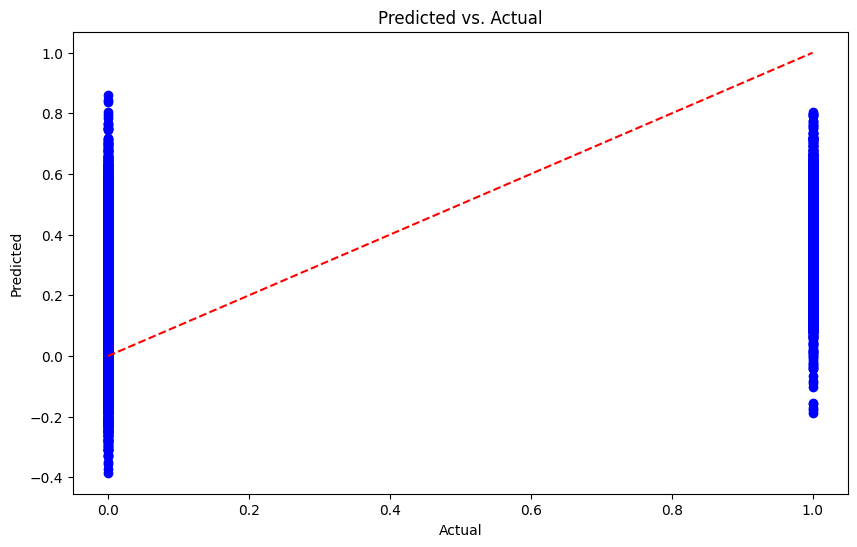

In [23]:
# Making predictions using our model
y_pred2 = lm2.predict(X_test2)
# creating scatterplot to compare predicted values vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred2, color='blue')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red')  # Identity line
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Creating a New Model as the Previous One isn't very Useful

As the income column is binary, the model we learned in class isn't very useful as the number can be only 0 and 1. Instead, we chose to use a confusion matrix.  

Accuracy: 0.7795275590551181


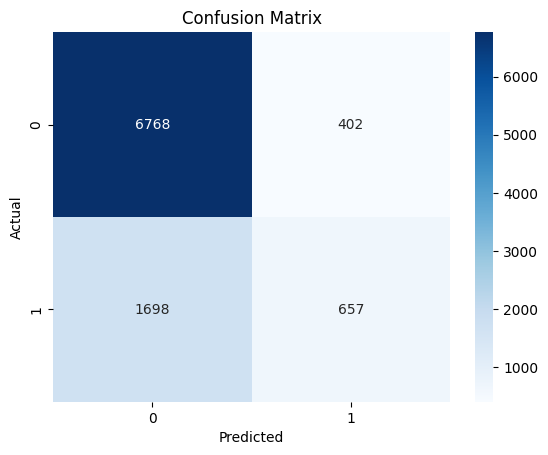

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87      7170
         1.0       0.62      0.28      0.38      2355

    accuracy                           0.78      9525
   macro avg       0.71      0.61      0.63      9525
weighted avg       0.76      0.78      0.75      9525



In [24]:
# creating new training set
X_proper = X2
X_proper_train, X_proper_test, y_train, y_test = train_test_split(X_proper, y, test_size=0.2, random_state=42)

# building a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_proper_train, y_train)
y_proper_pred = model.predict(X_proper_test)

accuracy = accuracy_score(y_test, y_proper_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_proper_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report:")
print(classification_report(y_test, y_proper_pred))

In [25]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation with accuracy scoring
cv_scores = cross_val_score(model, X_proper, y, cv=5, scoring='accuracy')  

print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores:
[0.78110236 0.78118438 0.78076438 0.78265435 0.77929441]
Mean Accuracy: 0.7809999768508566


In [26]:
from scipy.stats import chi2_contingency

# Create a contingency table for the categorical variables
contingency_table = pd.crosstab(X_proper['education-num'], y)

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Test")
print("Chi-Square Value:", chi2)
print("p-value:", p)

Chi-Square Test
Chi-Square Value: 6353.001625468278
p-value: 0.0


This is the proper logistic regression model, the previous models just showed the accuracy of the model. 

In [27]:
# Coefficients from the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X_proper.columns,
    'Coefficient': model.coef_[0]
})

print("Logistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
         Feature  Coefficient
0            age     0.043298
1  education-num     0.359326


In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split into training and test datasets
X3_train, X3_test, y3_train, y3_test = train_test_split(X_proper, y, test_size=0.3, random_state=42)

# Add a constant to account for the intercept
X3_train = sm.add_constant(X3_train)
X3_test = sm.add_constant(X3_test)

# Fit the logistic regression model
logistic_model = sm.Logit(y3_train, X3_train).fit()

# Display the summary
print('Logistic Regression Model Summary')
print(logistic_model.summary())


Optimization terminated successfully.
         Current function value: 0.465172
         Iterations 6
Logistic Regression Model Summary
                           Logit Regression Results                           
Dep. Variable:            income_>50K   No. Observations:                33334
Model:                          Logit   Df Residuals:                    33331
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1552
Time:                        16:40:10   Log-Likelihood:                -15506.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.6872      0.087    -76.519      0.000      -6.85

/tmp/ipykernel_79/1001535344.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = logistic_model.params[0]
/tmp/ipykernel_79/1001535344.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + coefs[0] * feature1_grid
/tmp/ipykernel_79/1001535344.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + coefs[1] * feature2_grid


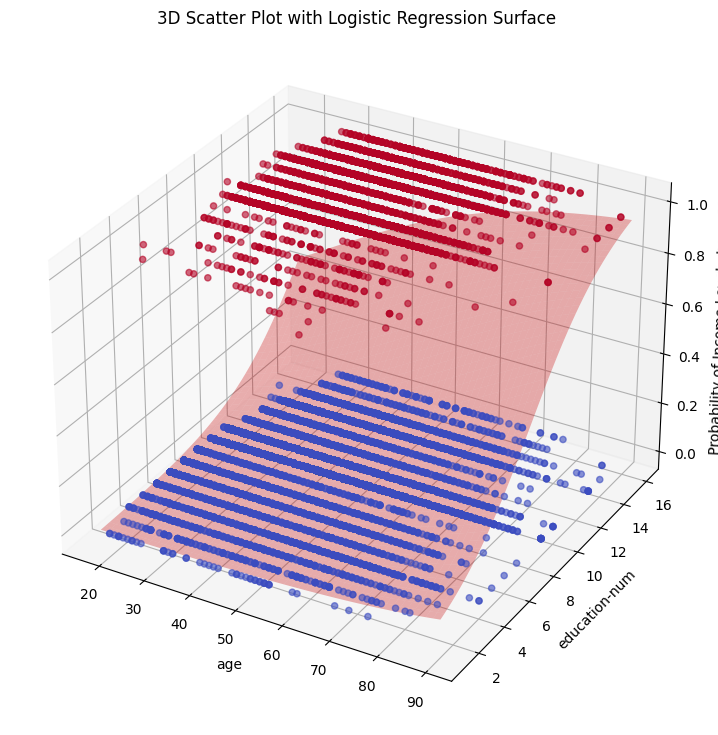

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from mpl_toolkits.mplot3d import Axes3D

intercept = logistic_model.params[0]
coefs = logistic_model.params[1:]

feature1_name = X3_train.columns[1]
feature2_name = X3_train.columns[2]

feature1_values = np.linspace(X3_train[feature1_name].min(), X3_train[feature1_name].max(), 50)
feature2_values = np.linspace(X3_train[feature2_name].min(), X3_train[feature2_name].max(), 50)

feature1_grid, feature2_grid = np.meshgrid(feature1_values, feature2_values)

logit = (
    intercept 
    + coefs[0] * feature1_grid
    + coefs[1] * feature2_grid
)

predicted_probs = expit(logit)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X3_train[feature1_name], X3_train[feature2_name], y3_train, label='Training Data', c=y3_train, cmap='coolwarm', alpha=0.6)

ax.plot_surface(feature1_grid, feature2_grid, predicted_probs, color='red', alpha=0.3)

ax.set_xlabel(feature1_name)
ax.set_ylabel(feature2_name)
ax.set_zlabel('Probability of Income Level above 50k')
ax.set_title('3D Scatter Plot with Logistic Regression Surface')

plt.show()

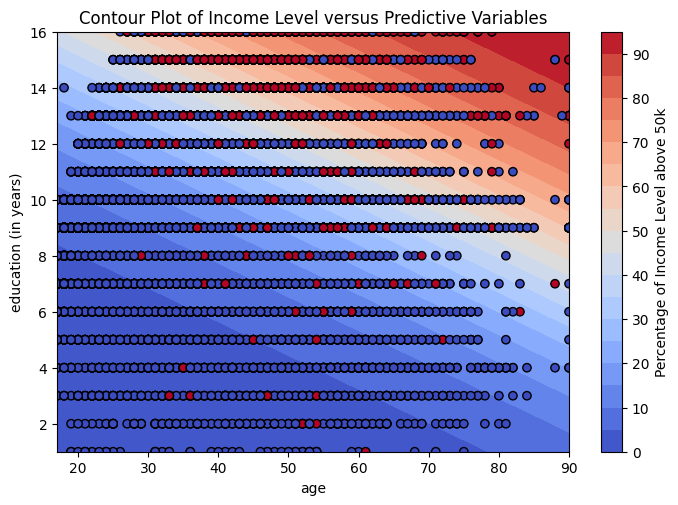

In [30]:
# much of this code is from the 3D model given previously, with the training data, logistic function and features
from scipy.special import expit  # sigmoid function

# Calculating the predicted probabilities
predicted_percentages = predicted_probs * 100

# Creating a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(feature1_grid, feature2_grid, predicted_percentages, cmap='coolwarm', levels=20)
plt.colorbar(contour, label='Percentage of Income Level above 50k')
plt.scatter(X3_train[feature1_name], X3_train[feature2_name], c=y3_train, cmap='coolwarm', edgecolors='k')
plt.xlabel(feature1_name)
plt.ylabel('education (in years)')
plt.title('Contour Plot of Income Level versus Predictive Variables')

# trying to fix clipping
''' plt.xlim([feature1_grid.min()-1, feature1_grid.max()+1])
plt.ylim([feature2_grid.min()-0.25, feature2_grid.max()+0.25]) '''
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5a4b6e-1010-40e6-b198-76fe211c20a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>